In [10]:
import os
import glob
import pydicom
import nibabel as nib
import pandas as pd
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from tqdm import tqdm

from PIL import Image, ImageOps

from sagittal_view_utils import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
DATA_DIR = "/Volumes/SSD970/"
SAGITTAL_IMAGE_DIR = "/Volumes/SSD9701/train_sagittal_images_jpeg95/"

## View sagittal image

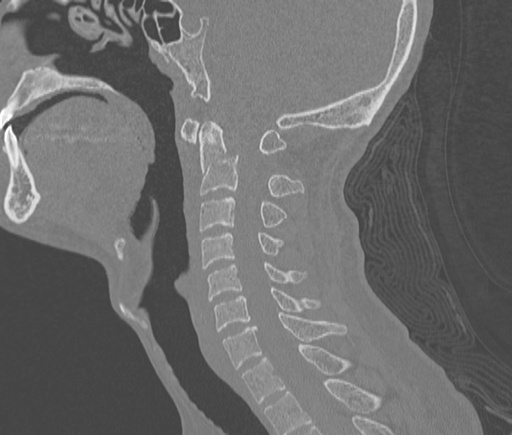

In [39]:
img = get_sagittal_image(SAGITTAL_IMAGE_DIR, "3882-240")
img

## View sagittal center image

In [22]:
position_df = pd.read_csv(os.path.join(DATA_DIR, f'infer_sagittal_position.csv')).set_index('UID')
position_df.head()

,direction,sagittal_index,bottom,right,top,left,z_spacing,pixel_spacing,aspect,width,height,coronal_left,coronal_top,coronal_right,coronal_bottom,sagittal_left,sagittal_top,sagittal_right,sagittal_bottom
UID,,,,,,,,,,,,,,,,,,,
1.2.826.0.1.3680043.10001,2,88,590,377,98,49,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,89,590,377,98,49,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,90,590,377,98,49,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,91,590,377,98,49,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,92,590,377,98,49,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213


In [26]:
coronal_df = pd.read_csv(os.path.join(DATA_DIR, f'infer_coronal_position.csv')).set_index('UID')
coronal_df.head()

,direction,coronal_index,bottom,right,top,left,z_spacing,pixel_spacing,aspect,width,height,coronal_left,coronal_top,coronal_right,coronal_bottom,sagittal_left,sagittal_top,sagittal_right,sagittal_bottom
UID,,,,,,,,,,,,,,,,,,,
1.2.826.0.1.3680043.10001,2,49,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,50,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,51,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,52,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213
1.2.826.0.1.3680043.10001,2,53,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213


In [37]:
coronal_df["coronal_center"] = (coronal_df["right"] + coronal_df["left"]) //2
coronal_df.head()

,direction,coronal_index,bottom,right,top,left,z_spacing,pixel_spacing,aspect,width,height,coronal_left,coronal_top,coronal_right,coronal_bottom,sagittal_left,sagittal_top,sagittal_right,sagittal_bottom,coronal_center
UID,,,,,,,,,,,,,,,,,,,,
1.2.826.0.1.3680043.10001,2,49,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213,260
1.2.826.0.1.3680043.10001,2,50,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213,260
1.2.826.0.1.3680043.10001,2,51,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213,260
1.2.826.0.1.3680043.10001,2,52,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213,260
1.2.826.0.1.3680043.10001,2,53,590,432,98,88,0.625,0.253906,2.461541,512,659,74,54,185,213,58,54,164,213,260


## center image
센터 위치를 보니까 정확히 C2 의 가장 높은 위치가 아니다.

260.0


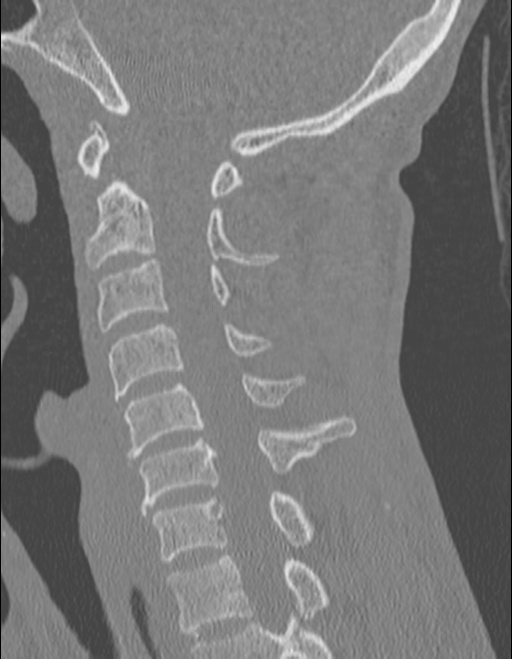

In [38]:
def get_center_sagittal_image(UID):
    PatientUID = get_PatientUID(UID)
    center_position = coronal_df.loc[PatientUID].iloc[0].coronal_center
    print(center_position)
    img = get_sagittal_image(SAGITTAL_IMAGE_DIR, f"{UID}-{center_position}")
    return img

img = get_center_sagittal_image("10001")
img